# 23. Heaps And Hashing

**Q1. Given preorder of a binary tree, calculate its [depth(or height)](https://www.geeksforgeeks.org/write-a-c-program-to-find-the-maximum-depth-or-height-of-a-tree/) [starting from depth 0]. The preorder is given as a string with two possible characters.**

1. ‘l’ denotes the leaf
2. ‘n’ denotes internal node

The given tree can be seen as a full binary tree where every node has 0 or two children. The two children of a node can ‘n’ or ‘l’ or mix of both.

Examples :

Input  : nlnll
Output : 2
Explanation :

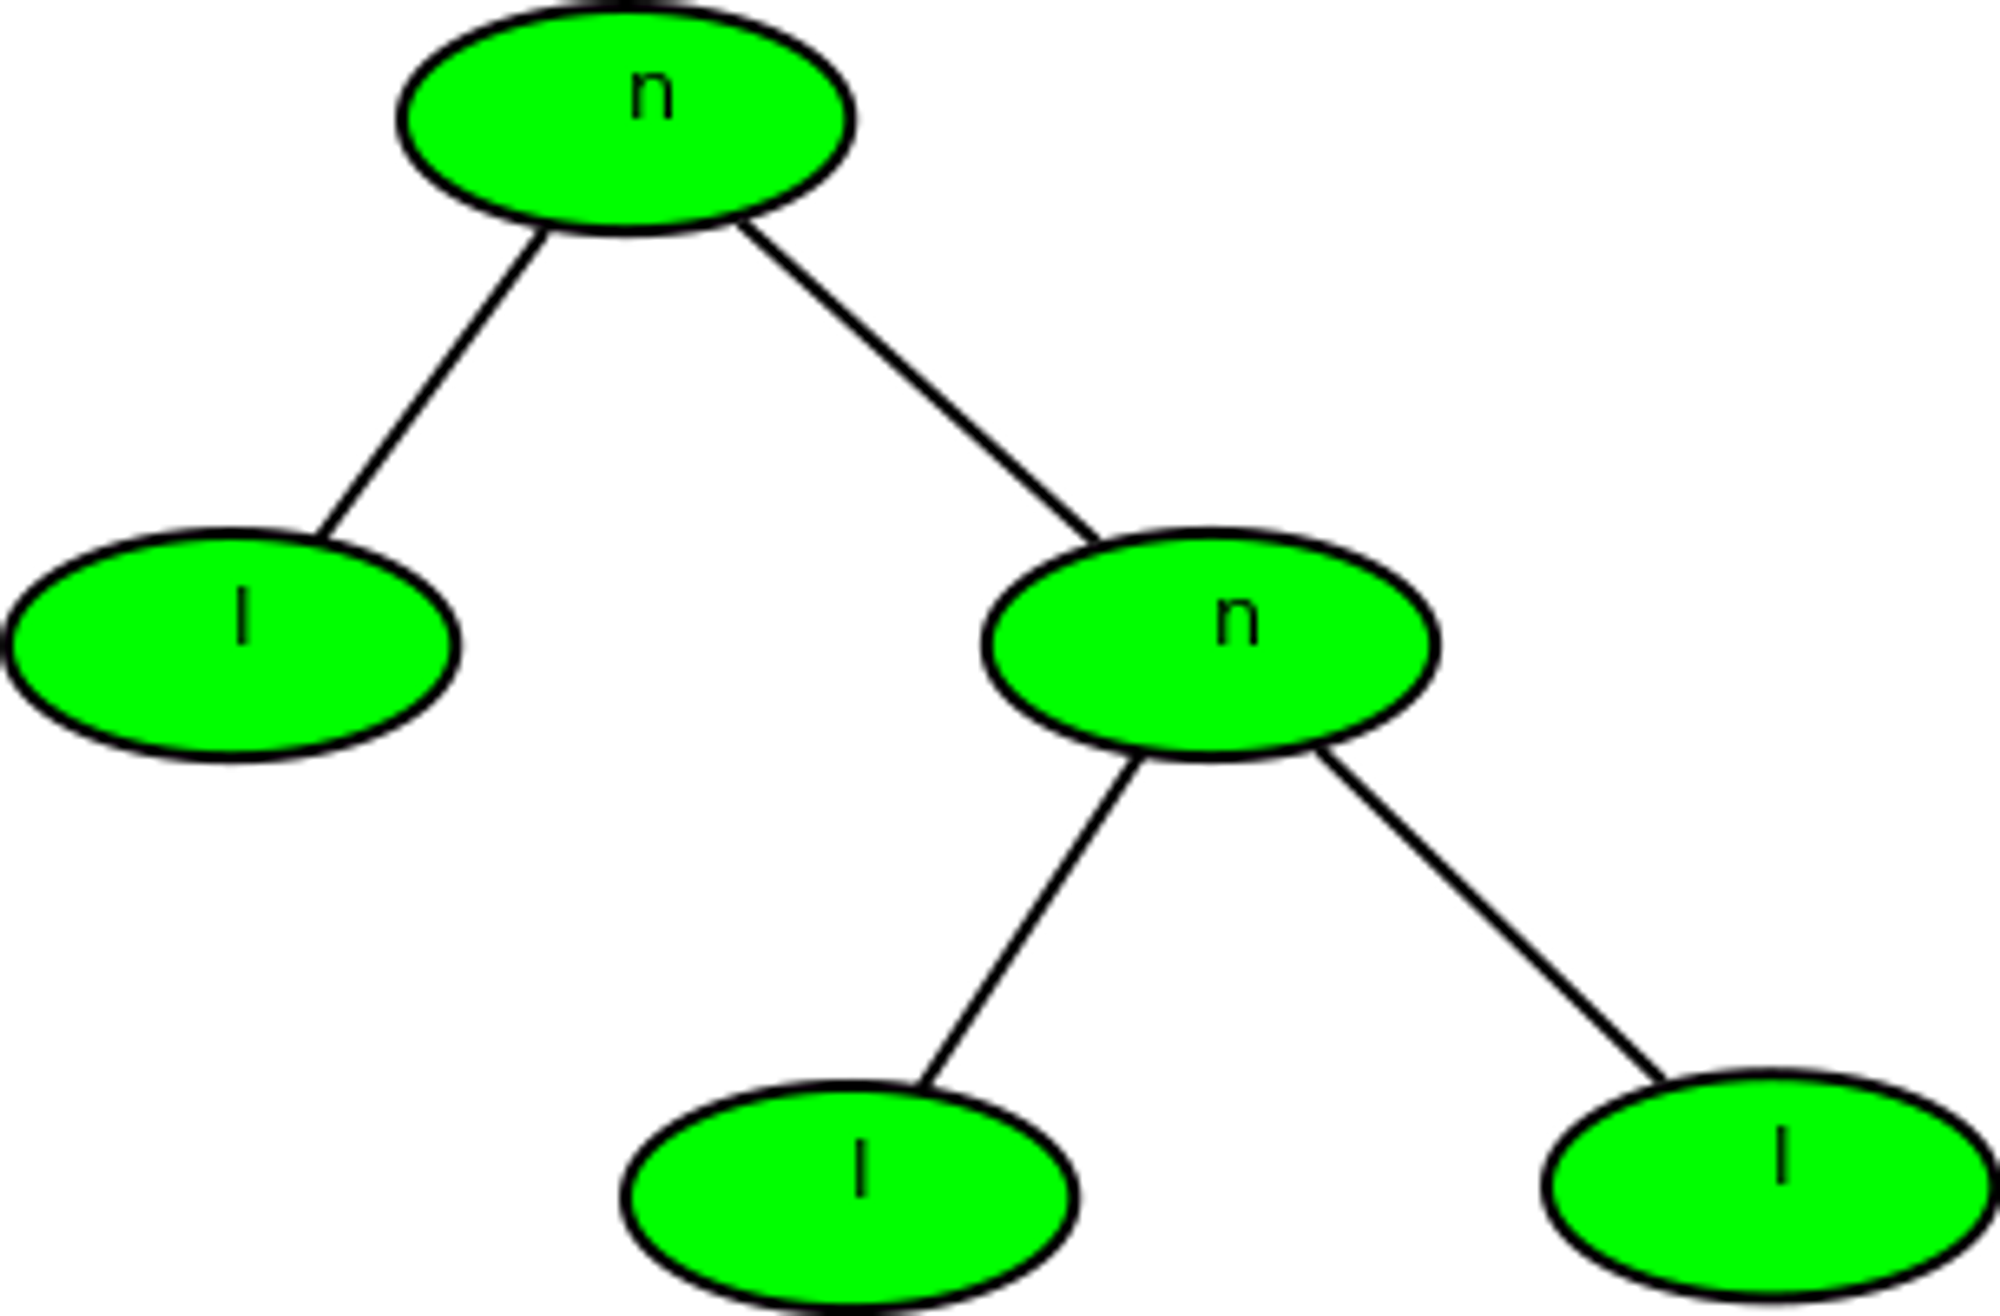

Input  : nlnnlll
Output : 3

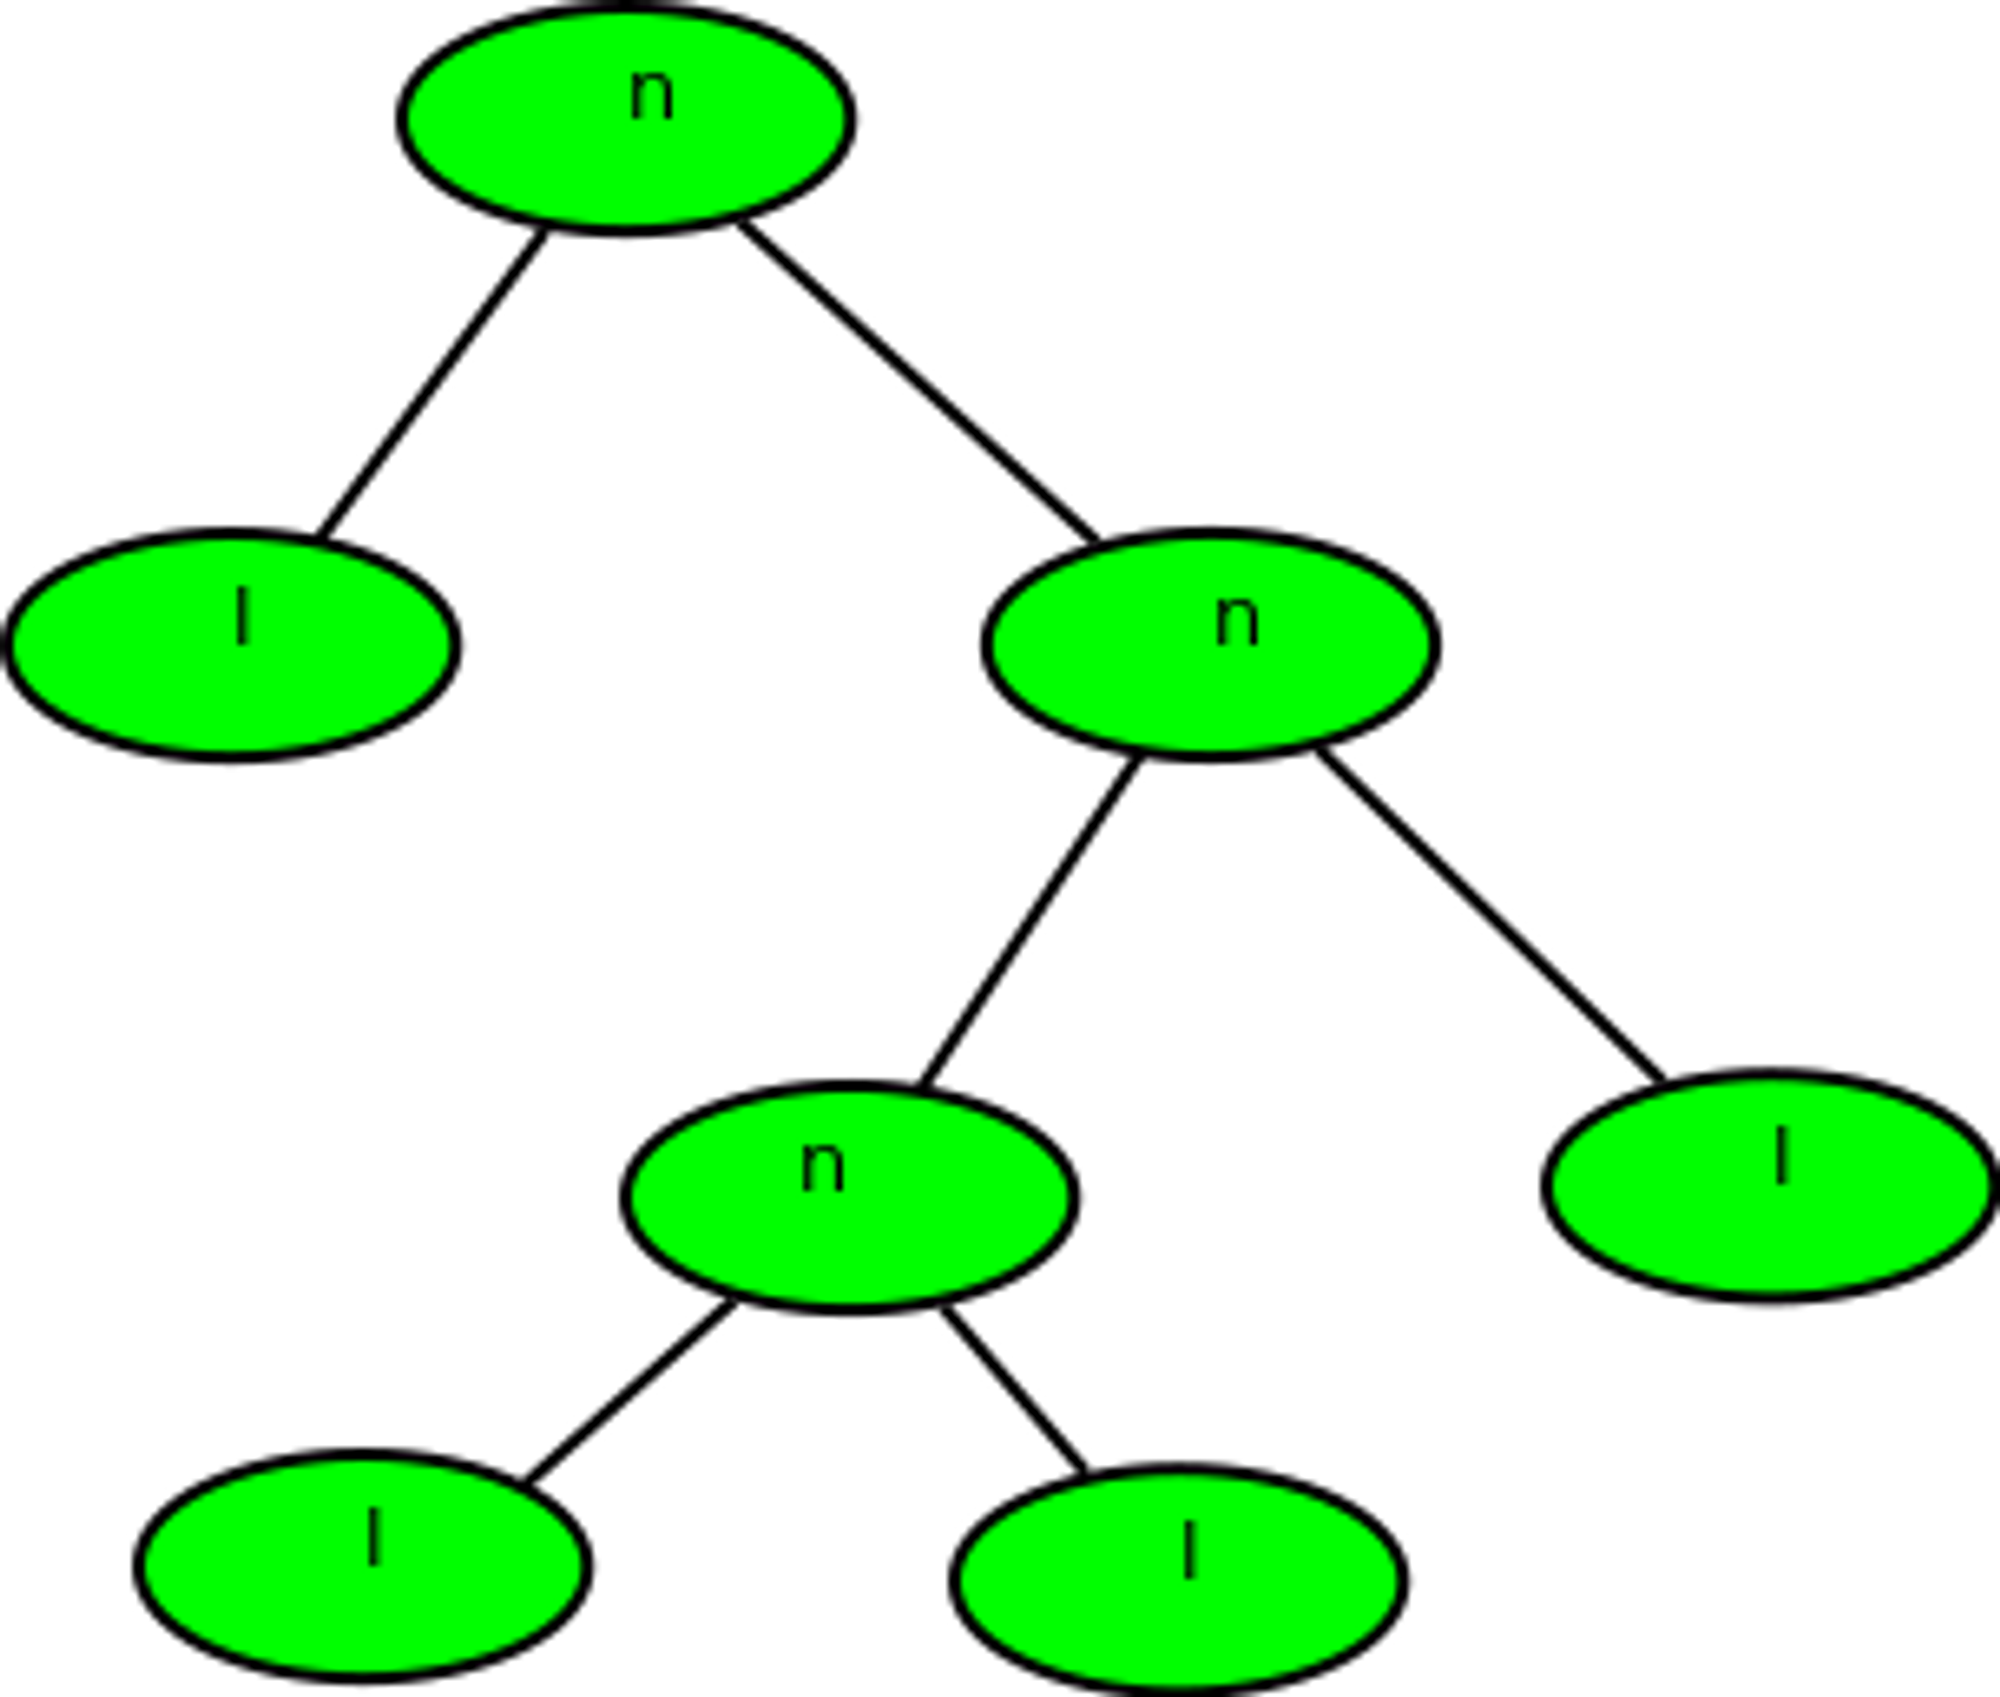

In [1]:
def find_depth(preorder):
    depth = 0
    for i in range(len(preorder)):
        if preorder[i] == "n":
            depth += 1
    return depth


preorder = "nlnll"
print(find_depth(preorder))

2


**Q2. Given a Binary tree, the task is to print the left view of the Binary Tree. The left view of a Binary Tree is a set of leftmost nodes for every level.**

Examples:

Input:

            4

          /   \

        5     2

             /   \

            3     1

           /  \

          6    7

Output: 4 5 3 6

Explanation:

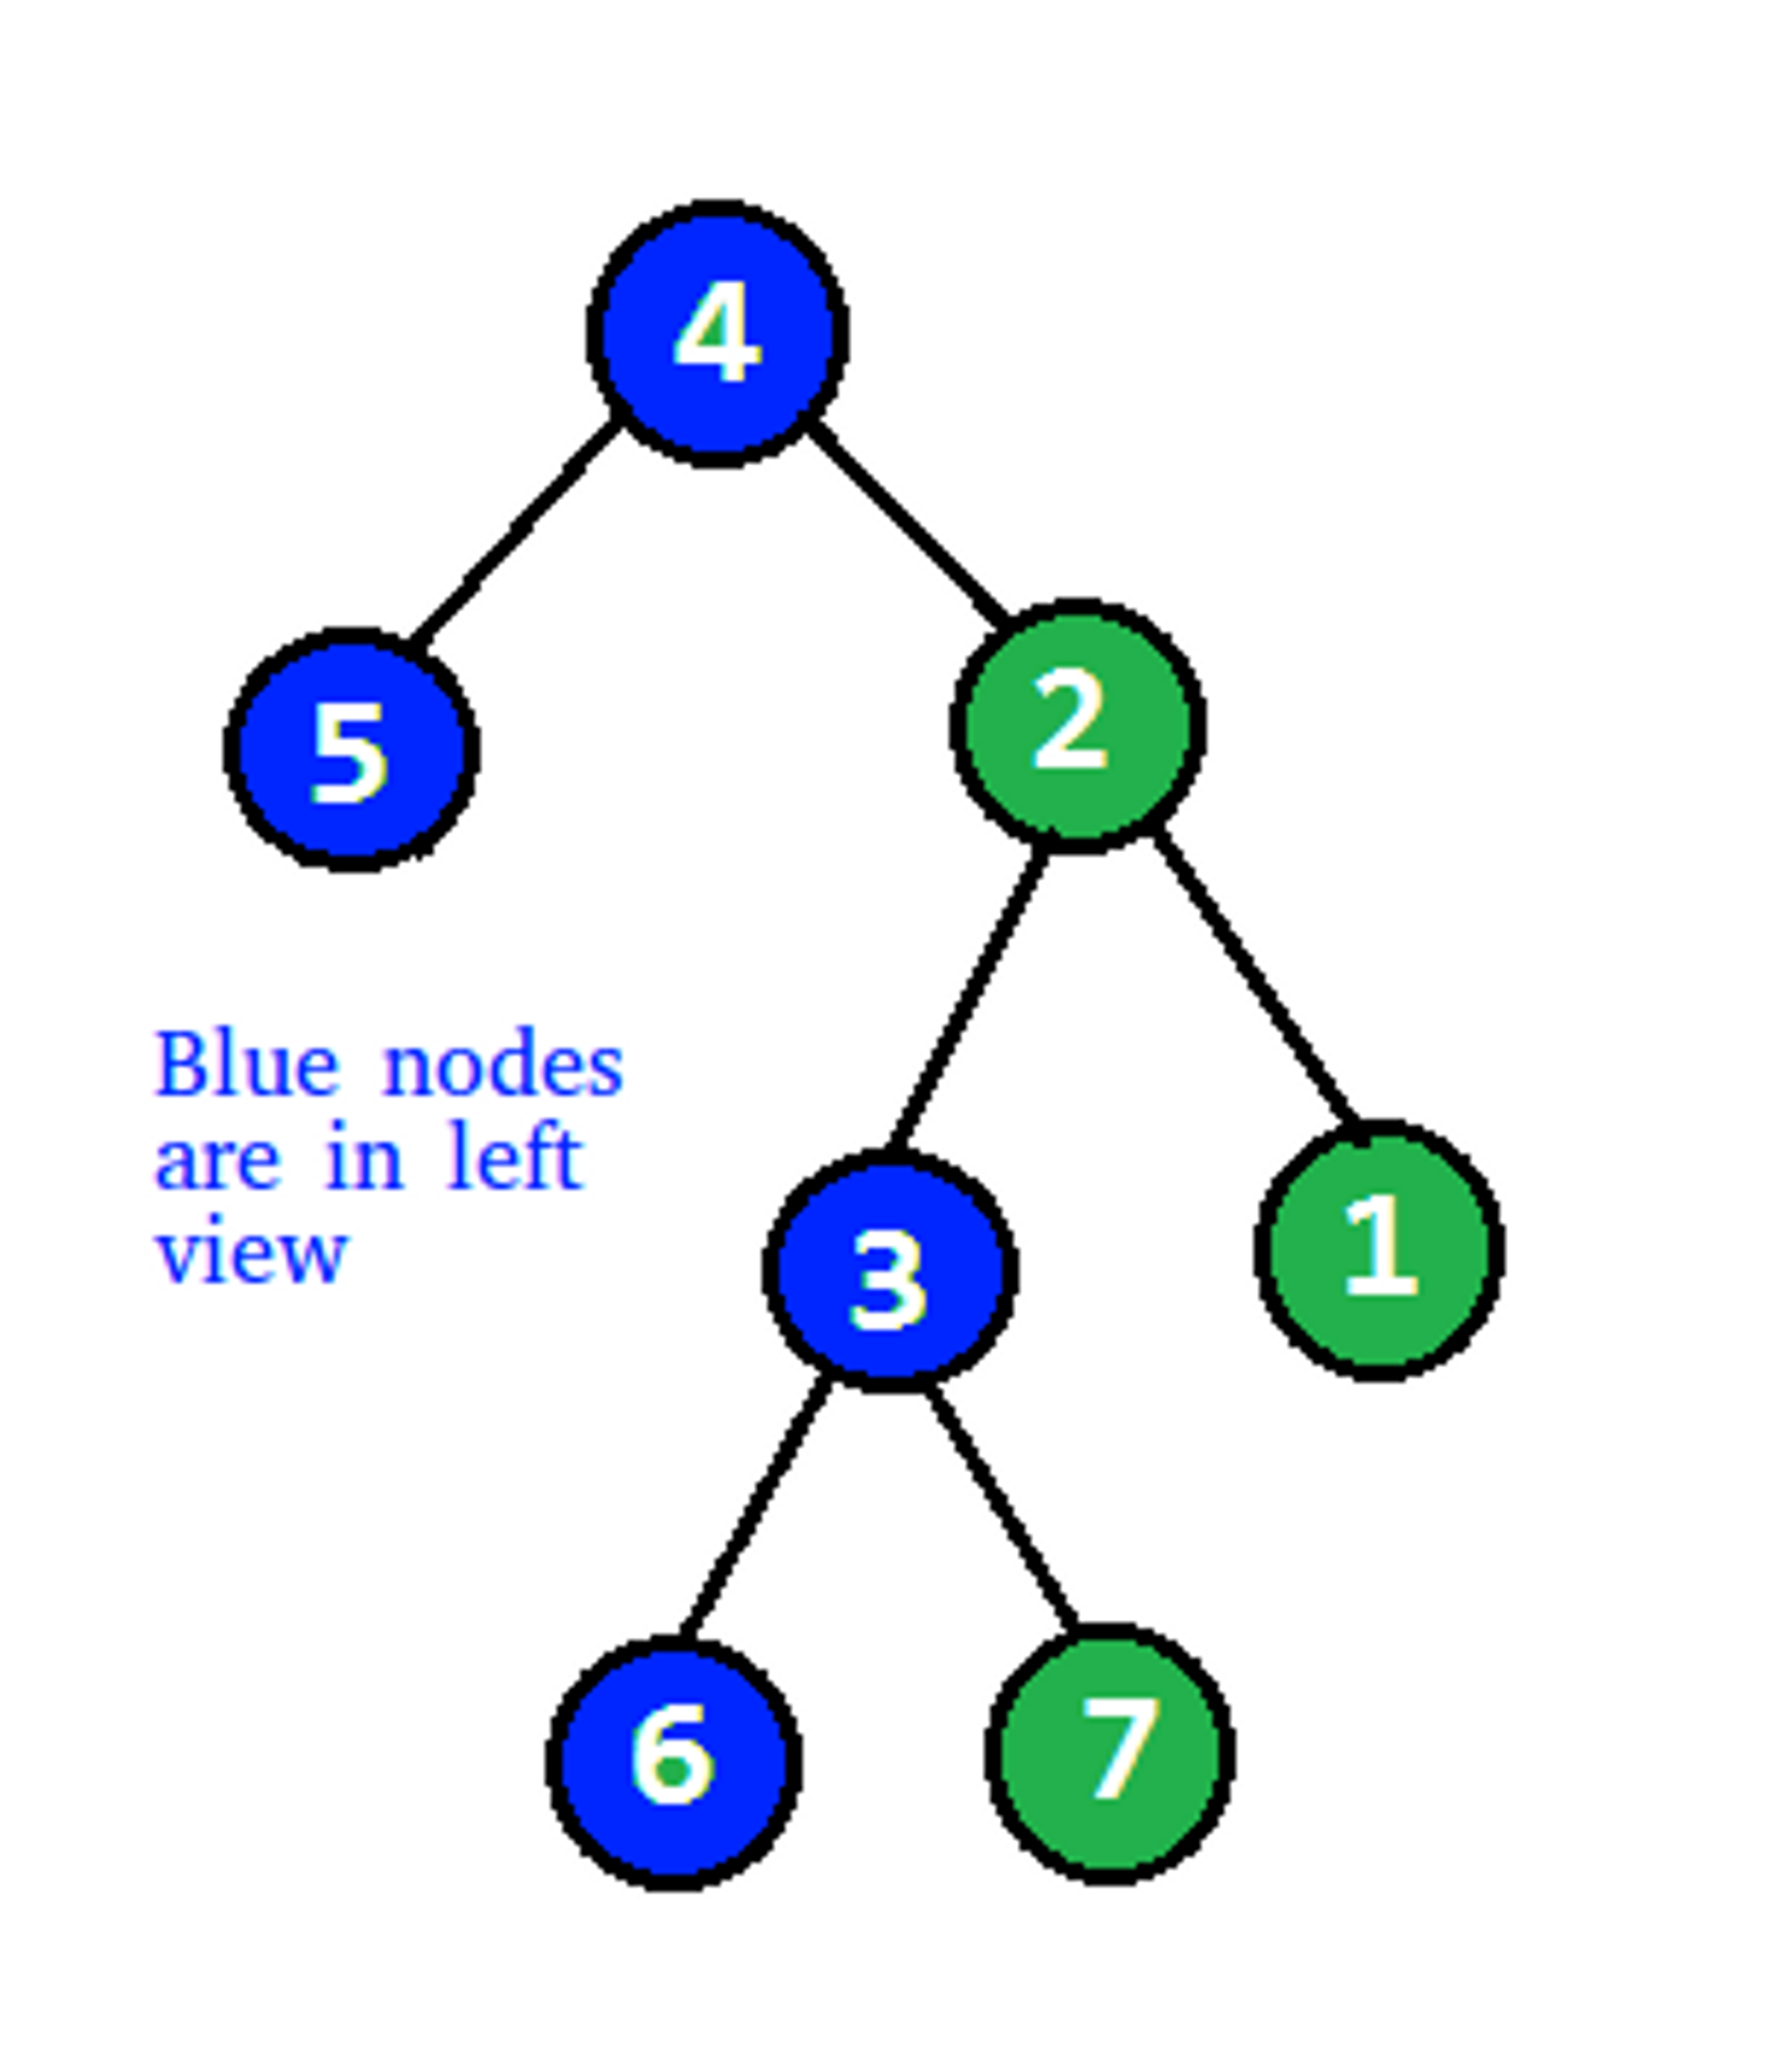

Input:

                    1

                  /   \

                2       3

                 \

                   4

                     \

                        5

                           \

                             6

Output: 1 2 4 5 6

In [2]:
def create_tree(value, left=None, right=None):
    return {'value': value, 'left': left, 'right': right}

def left_view(tree):
    if tree is None:
        return []

    left_view_list = []
    queue = [(tree, 1)]

    while queue:
        node, level = queue.pop(0)

        if level > len(left_view_list):
            left_view_list.append(node['value'])

        if node['left']:
            queue.append((node['left'], level + 1))

        if node['right']:
            queue.append((node['right'], level + 1))

    return left_view_list


tree = create_tree(4,
                   create_tree(5),
                   create_tree(2,
                               create_tree(3,
                                           create_tree(6),
                                           create_tree(7)),
                               create_tree(1)))

left_view_list = left_view(tree)
print(left_view_list)


[4, 5, 3, 6]


**Q3. Given a Binary Tree, print the Right view of it.**

The right view of a Binary Tree is a set of nodes visible when the tree is visited from the Right side.

Examples:

Input:

         1

      /     \

   2         3

/   \       /  \

4     5   6    7

             \

               8

Output: 

Right view of the tree is 1 3 7 8

Input:

         1

       /

    8

  /

7

Output: 

Right view of the tree is 1 8 7

In [3]:
def create_tree(value, left=None, right=None):
    return {'value': value, 'left': left, 'right': right}

def right_view(tree):
    if tree is None:
        return []

    right_view_list = []
    queue = [(tree, 1)]

    while queue:
        node, level = queue.pop(0)

        if level > len(right_view_list):
            right_view_list.append(node['value'])

        if node['right']:
            queue.append((node['right'], level + 1))

        if node['left']:
            queue.append((node['left'], level + 1))

    return right_view_list

tree=  create_tree(1,
                  create_tree(2,
                             create_tree(4),
                             create_tree(5)),
                  create_tree(3,
                             create_tree(6),
                             create_tree(7,
                                        create_tree(8))))

right_view_list = right_view(tree)
print(right_view_list)

[1, 3, 7, 8]


**Q4. Given a Binary Tree, The task is to print the bottom view from left to right. A node x is there in output if x is the bottommost node at its horizontal distance. The horizontal distance of the left child of a node x is equal to a horizontal distance of x minus 1, and that of a right child is the horizontal distance of x plus 1.**

Examples:

Input:

             20

           /     \

        8         22

    /      \         \

5         3        25

        /    \

   10       14

Output: 5, 10, 3, 14, 25.

Input:

             20

           /     \

        8         22

    /      \      /   \

 5         3    4     25

         /    \

     10       14

Output:

5 10 4 14 25.

Explanation:

If there are multiple bottom-most nodes for a horizontal distance from the root, then print the later one in the level traversal.

3 and 4 are both the bottom-most nodes at a horizontal distance of 0, we need to print 4.

In [4]:
from collections import deque

def create_tree(value, left=None, right=None):
    return {'value': value, 'left': left, 'right': right}

def bottom_view(tree):
    if tree is None:
        return []

    bottom_view_map = {}  # To store the bottom view nodes by horizontal distance
    queue = deque([(tree, 0)])  # Use deque for efficient queue operations

    while queue:
        node, hd = queue.popleft()
        bottom_view_map[hd] = node['value']  # Update the bottom view node for the current horizontal distance

        if node['left']:
            queue.append((node['left'], hd - 1))  # Update horizontal distance for the left child

        if node['right']:
            queue.append((node['right'], hd + 1))  # Update horizontal distance for the right child

    bottom_view_list = [bottom_view_map[hd] for hd in sorted(bottom_view_map)]
    return bottom_view_list

# Create the binary tree
tree = create_tree(20,
                   create_tree(8,
                               create_tree(5,
                                           create_tree(10)),
                               create_tree(3,
                                           None,
                                           create_tree(14))),
                   create_tree(22,
                               None,
                               create_tree(25)))

# Find and print the bottom view
bottom_view_list = bottom_view(tree)
print(bottom_view_list)


[10, 5, 8, 3, 14, 25]
